In [1]:
import numpy as np
import pandas as pd
import json
from tqdm import tqdm
import os

In [3]:
dataframe = pd.read_csv("/research/video_metaphor/data/csv/vmcd_v2/VMCD_v2.csv", header=0)
print(len(dataframe))
dataframe.head()

705


,unique_id,annotator_1,annotator_2,annotator_3
0,__C7sd_UDU0,Bullying is as dangerous as death.,Bullying is as fatal as suicide.,Bullying is as perilous as a self harm
1,__uCQMKry3w,Corn ethanol emissions are as bad as petrol em...,Ethanol is as harmful as destroying plants.,Corn ethanol emissions are as high as petrol e...
2,_6MAkLJ79LE,The board game is as similar as a real operation.,The game is as skilful as a skilled doctor.,The board game is as realistic as a real opera...
3,_6rj5jisB7g,The car is as valuable as a hostage.,The car is as valuable as one's life.,The car is as sought-after as a hostage.
4,_BZsIY6PUPU,Making unusual food combinations is as unconve...,Food item is as Good as cartoon,Unusual food choices are as satisfying as happ...


In [4]:
!pip install moviepy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
^C
Traceback (most recent call last):
  File "/opt/conda/envs/llava/bin/pip", line 10, in <module>
    sys.exit(main())
  File "/opt/conda/envs/llava/lib/python3.10/site-packages/pip/_internal/cli/main.py", line 79, in main
    return command.main(cmd_args)
  File "/opt/conda/envs/llava/lib/python3.10/site-packages/pip/_internal/cli/base_command.py", line 101, in main
    return self._main(args)
  File "/opt/conda/envs/llava/lib/python3.10/site-packages/pip/_internal/cli/base_command.py", line 236, in _main
    self.handle_pip_version_check(options)
  File "/opt/conda/envs/llava/lib/python3.10/site-packages/pip/_internal/cli/req_command.py", line 188, in handle_pip_version_check
    pip_self_version_check(session, options)
  File "/opt/conda/envs/llava/lib/python3.10/site-packages/pip/_internal/self_outdated_check.py", line 236, in pip_self_version_check
    upgrade_prompt = _self_version_check_logic(
  File "/opt

In [5]:
def with_moviepy(filename):
    from moviepy.editor import VideoFileClip
    base_path = "/research/video_metaphor/data/videos/"
    file_path = f"{base_path}{filename}.mp4"

    clip = VideoFileClip(file_path)
    duration       = clip.duration
    fps            = clip.fps
    width, height  = clip.size
    return duration, fps, (width, height)



In [6]:
video_ids = dataframe["unique_id"].tolist()

duration = 0.0
all_duration = []

for id in tqdm(video_ids):
    dur, fc, tt = with_moviepy(id)
    duration += dur
    all_duration.append(dur)

100%|██████████| 705/705 [02:35<00:00,  4.53it/s]


In [10]:
print("Average duration: ", duration/ len(all_duration))
# print("Average frames: ", frames/ len(all_frame_counts))

Average duration:  54.48123404255315


In [11]:
captions1 = dataframe["annotator_1"].tolist()
captions2 = dataframe["annotator_2"].tolist()
captions3 = dataframe["annotator_3"].tolist()
all_captions = captions1 + captions2 + captions3
print(len(all_captions))


2115


In [12]:
cap_lengths = []
for cap in all_captions:
    cap_le = len(cap.split())
    cap_lengths.append(cap_le)

print(sum(cap_lengths)/len(cap_lengths))

8.956973995271868


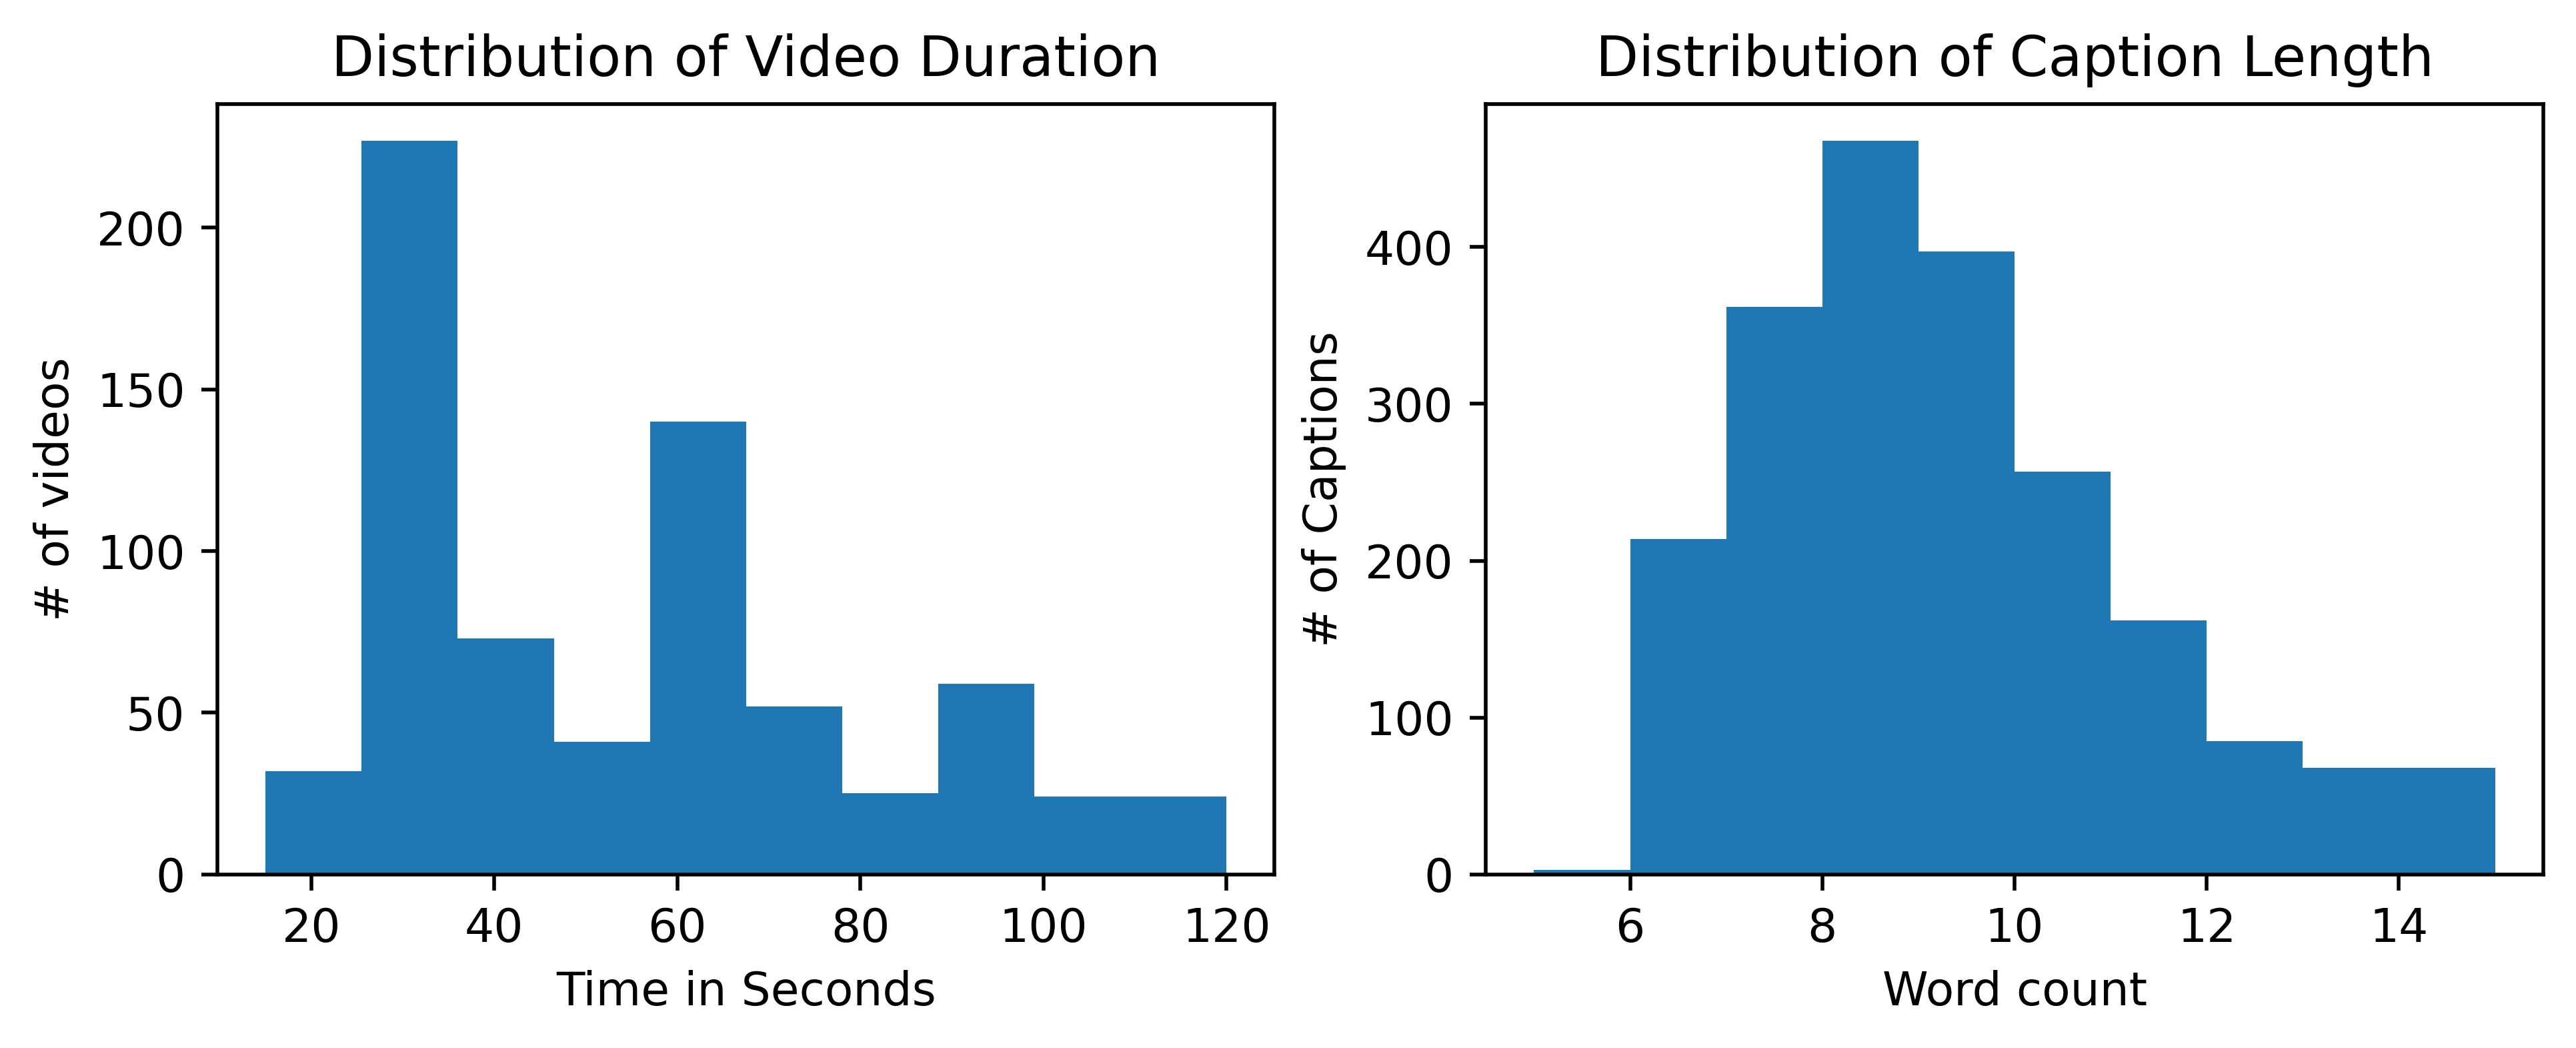

In [14]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2,figsize=(9,3),dpi=500)
plt.subplot(1, 2, 1)
plt.hist(all_duration, range=(15,120))
plt.title("Distribution of Video Duration")
axes[0].set_xlabel('Time in Seconds')
axes[0].set_ylabel('# of videos')
plt.subplot(1, 2, 2)
plt.hist(cap_lengths, range=(5,15))
axes[1].set_xlabel('Word count')
axes[1].set_ylabel('# of Captions')
plt.title("Distribution of Caption Length")
plt.show()

In [34]:
import re
def split_to_parts(sentence):
    pattern = r'as \w+ as'
    parts = re.split(pattern, sentence)

    # Remove any leading or trailing whitespace from the parts
    parts = [part.strip() for part in parts if part.strip()]
    # Removing last word from primary concept as it could be is or are
    parts[0] = " ".join(parts[0].split()[:-1])
    if len(parts) == 1:
        parts.append("")
    return parts

In [35]:
primary_secondary_concepts = [split_to_parts(sent) for sent in tqdm(all_captions)]
# print(primary_secondary_concepts[0:5])
primary_concepts = [item[0] for item in primary_secondary_concepts]
sec_concepts = [item[1] for item in primary_secondary_concepts]

100%|██████████| 2115/2115 [00:00<00:00, 339870.23it/s]


In [ ]:
!pip install wordcloud

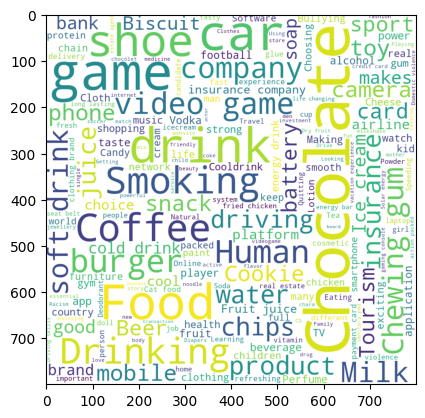

In [36]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("much")
stopwords.add("make")


all_words = []
for sent in primary_concepts:
    tokens = sent.split()
    all_words += tokens

comment_words = ""
comment_words += " ".join(all_words)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       

plt.imshow(wordcloud) 
plt.show()

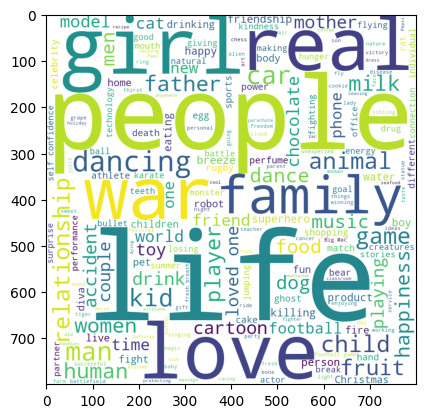

In [37]:
all_words = []
for sent in sec_concepts:
    tokens = sent.split()
    all_words += tokens

comment_words = ""
comment_words += " ".join(all_words)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       

plt.imshow(wordcloud) 
plt.show()